In [1]:
# The code was removed by Watson Studio for sharing.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
body = client_1e4e3dadbdb0453a8e88bb9acb658958.get_object(Bucket='predicthouseprice-donotdelete-pr-wwwurrpnxibc6k',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test_df = pd.read_csv(body)
test_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Import Library

In [73]:
#import some necessary librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
%pip install mlxtend
from mlxtend.regressor import StackingCVRegressor
%pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMRegressor
%pip install xgboost
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

#preprocess
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Tuning
from sklearn.model_selection import GridSearchCV

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

#Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

#Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Auto EDA
%pip install pandas_profiling 
import pandas_profiling 

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Correlation
%pip install ppscore
import ppscore

Note: you may need to restart the kernel to use updated packages.


In [6]:
#report = pandas_profiling.ProfileReport(train_df)
#display(report)

# EDA

## Find Categorical and Numeric Columns

In [7]:
def get_feature_names(df):

    categorical_df = df.select_dtypes(include=['object'])
    numeric_df = df.select_dtypes(exclude=['object'])

    # And then, storing the names of categorical and numerical columns.
    categorical_columns = list(categorical_df.columns)
    numeric_columns = list(numeric_df.columns)
    
    print("Categorical columns:" , len(categorical_columns) ,"\n", categorical_columns)
    print("\nNumeric columns:", len(numeric_columns) ,"\n",numeric_columns)

    return  categorical_columns, numeric_columns

get_feature_names(train_df)

Categorical columns: 43 
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Numeric columns: 38 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCa

(['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'SaleType',
  'SaleCondition'],
 ['Id',
  'MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'Bedro

In [8]:
num_col = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
           'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
           'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

## Correlation Matrix

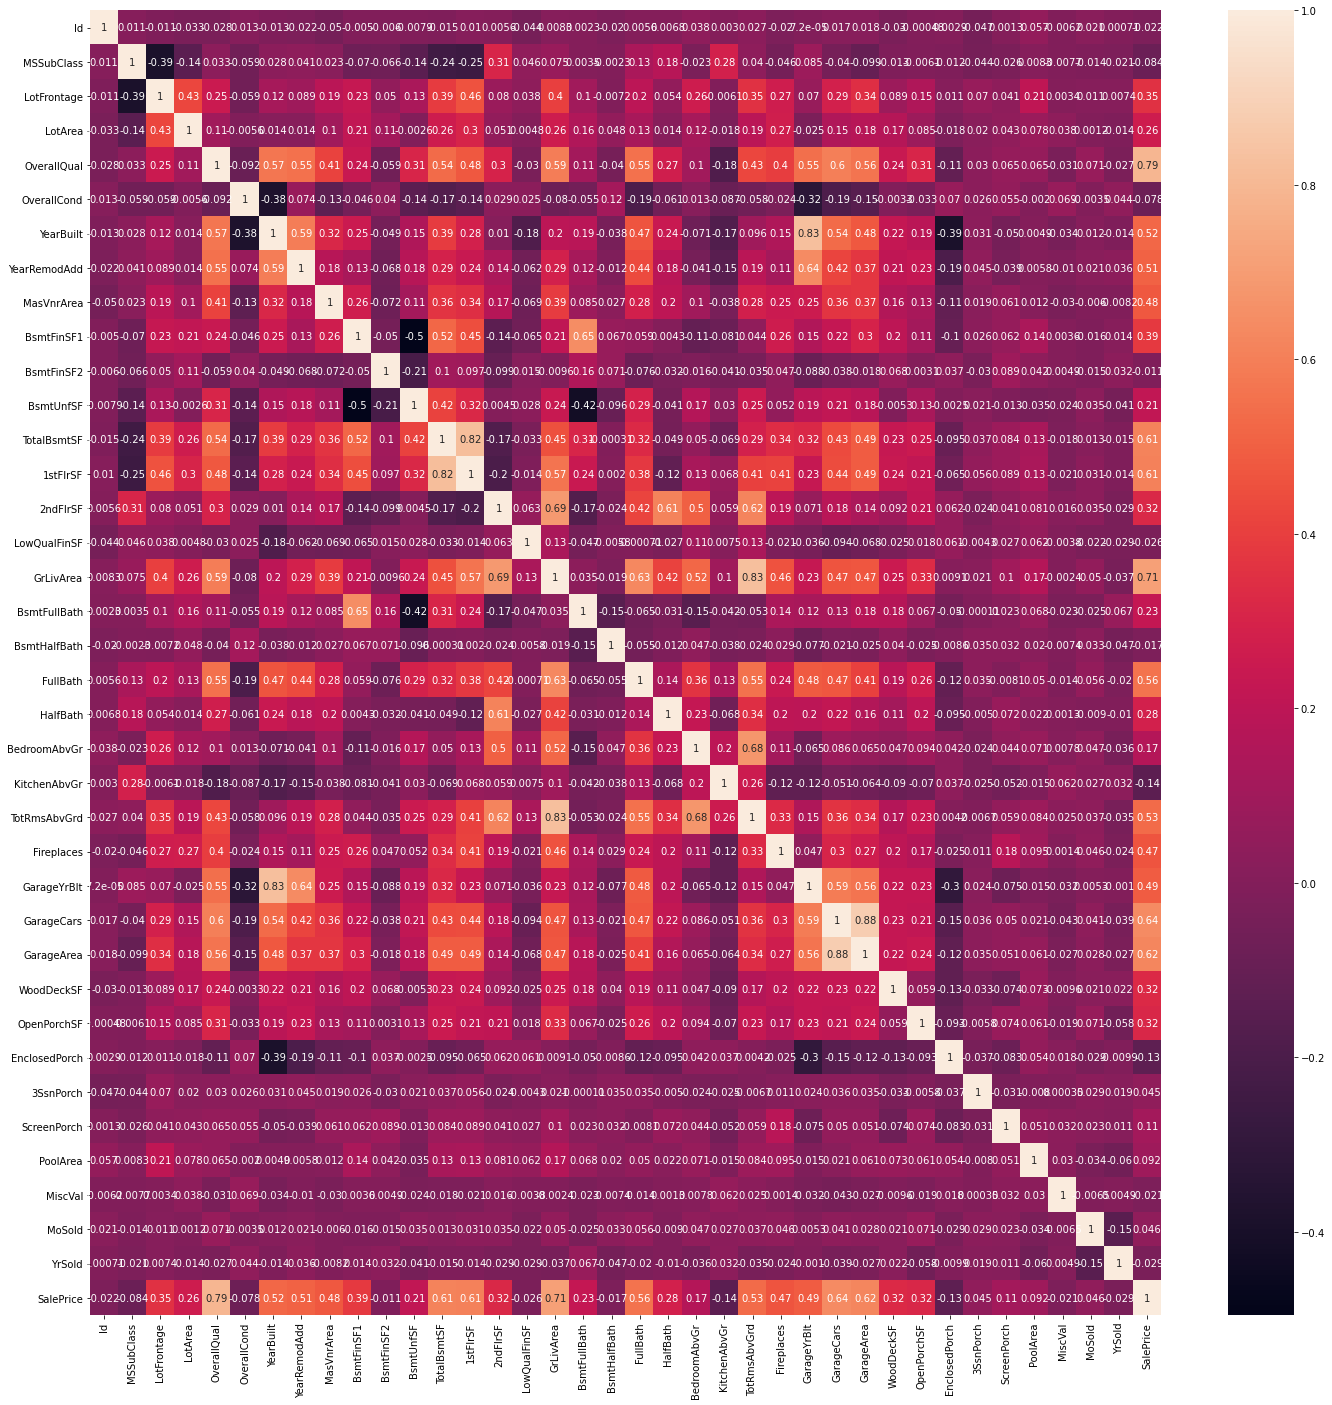

In [9]:
corr_mx = train_df[num_col].corr()
fig,ax=plt.subplots(figsize=(24,24))
ax=sns.heatmap(corr_mx, annot=True)
plt.show()

In [10]:
#There is 0.83 or 83% correlation between GarageYrBlt and YearBuilt.
#83% correlation between TotRmsAbvGrd and GrLivArea.
#89% correlation between GarageCars and GarageArea.

In [11]:
##Choosing Variable
numeric_features_high_corr = corr_mx['SalePrice'][corr_mx['SalePrice']>=0.35]
numeric_features_high_corr.index
numeric_features_high_corr

LotFrontage     0.351799
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
BsmtFinSF1      0.386420
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [12]:
##Choose Indpendent Variable 
numeric_features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']
numeric_features_with_SalePrice =['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea','SalePrice']

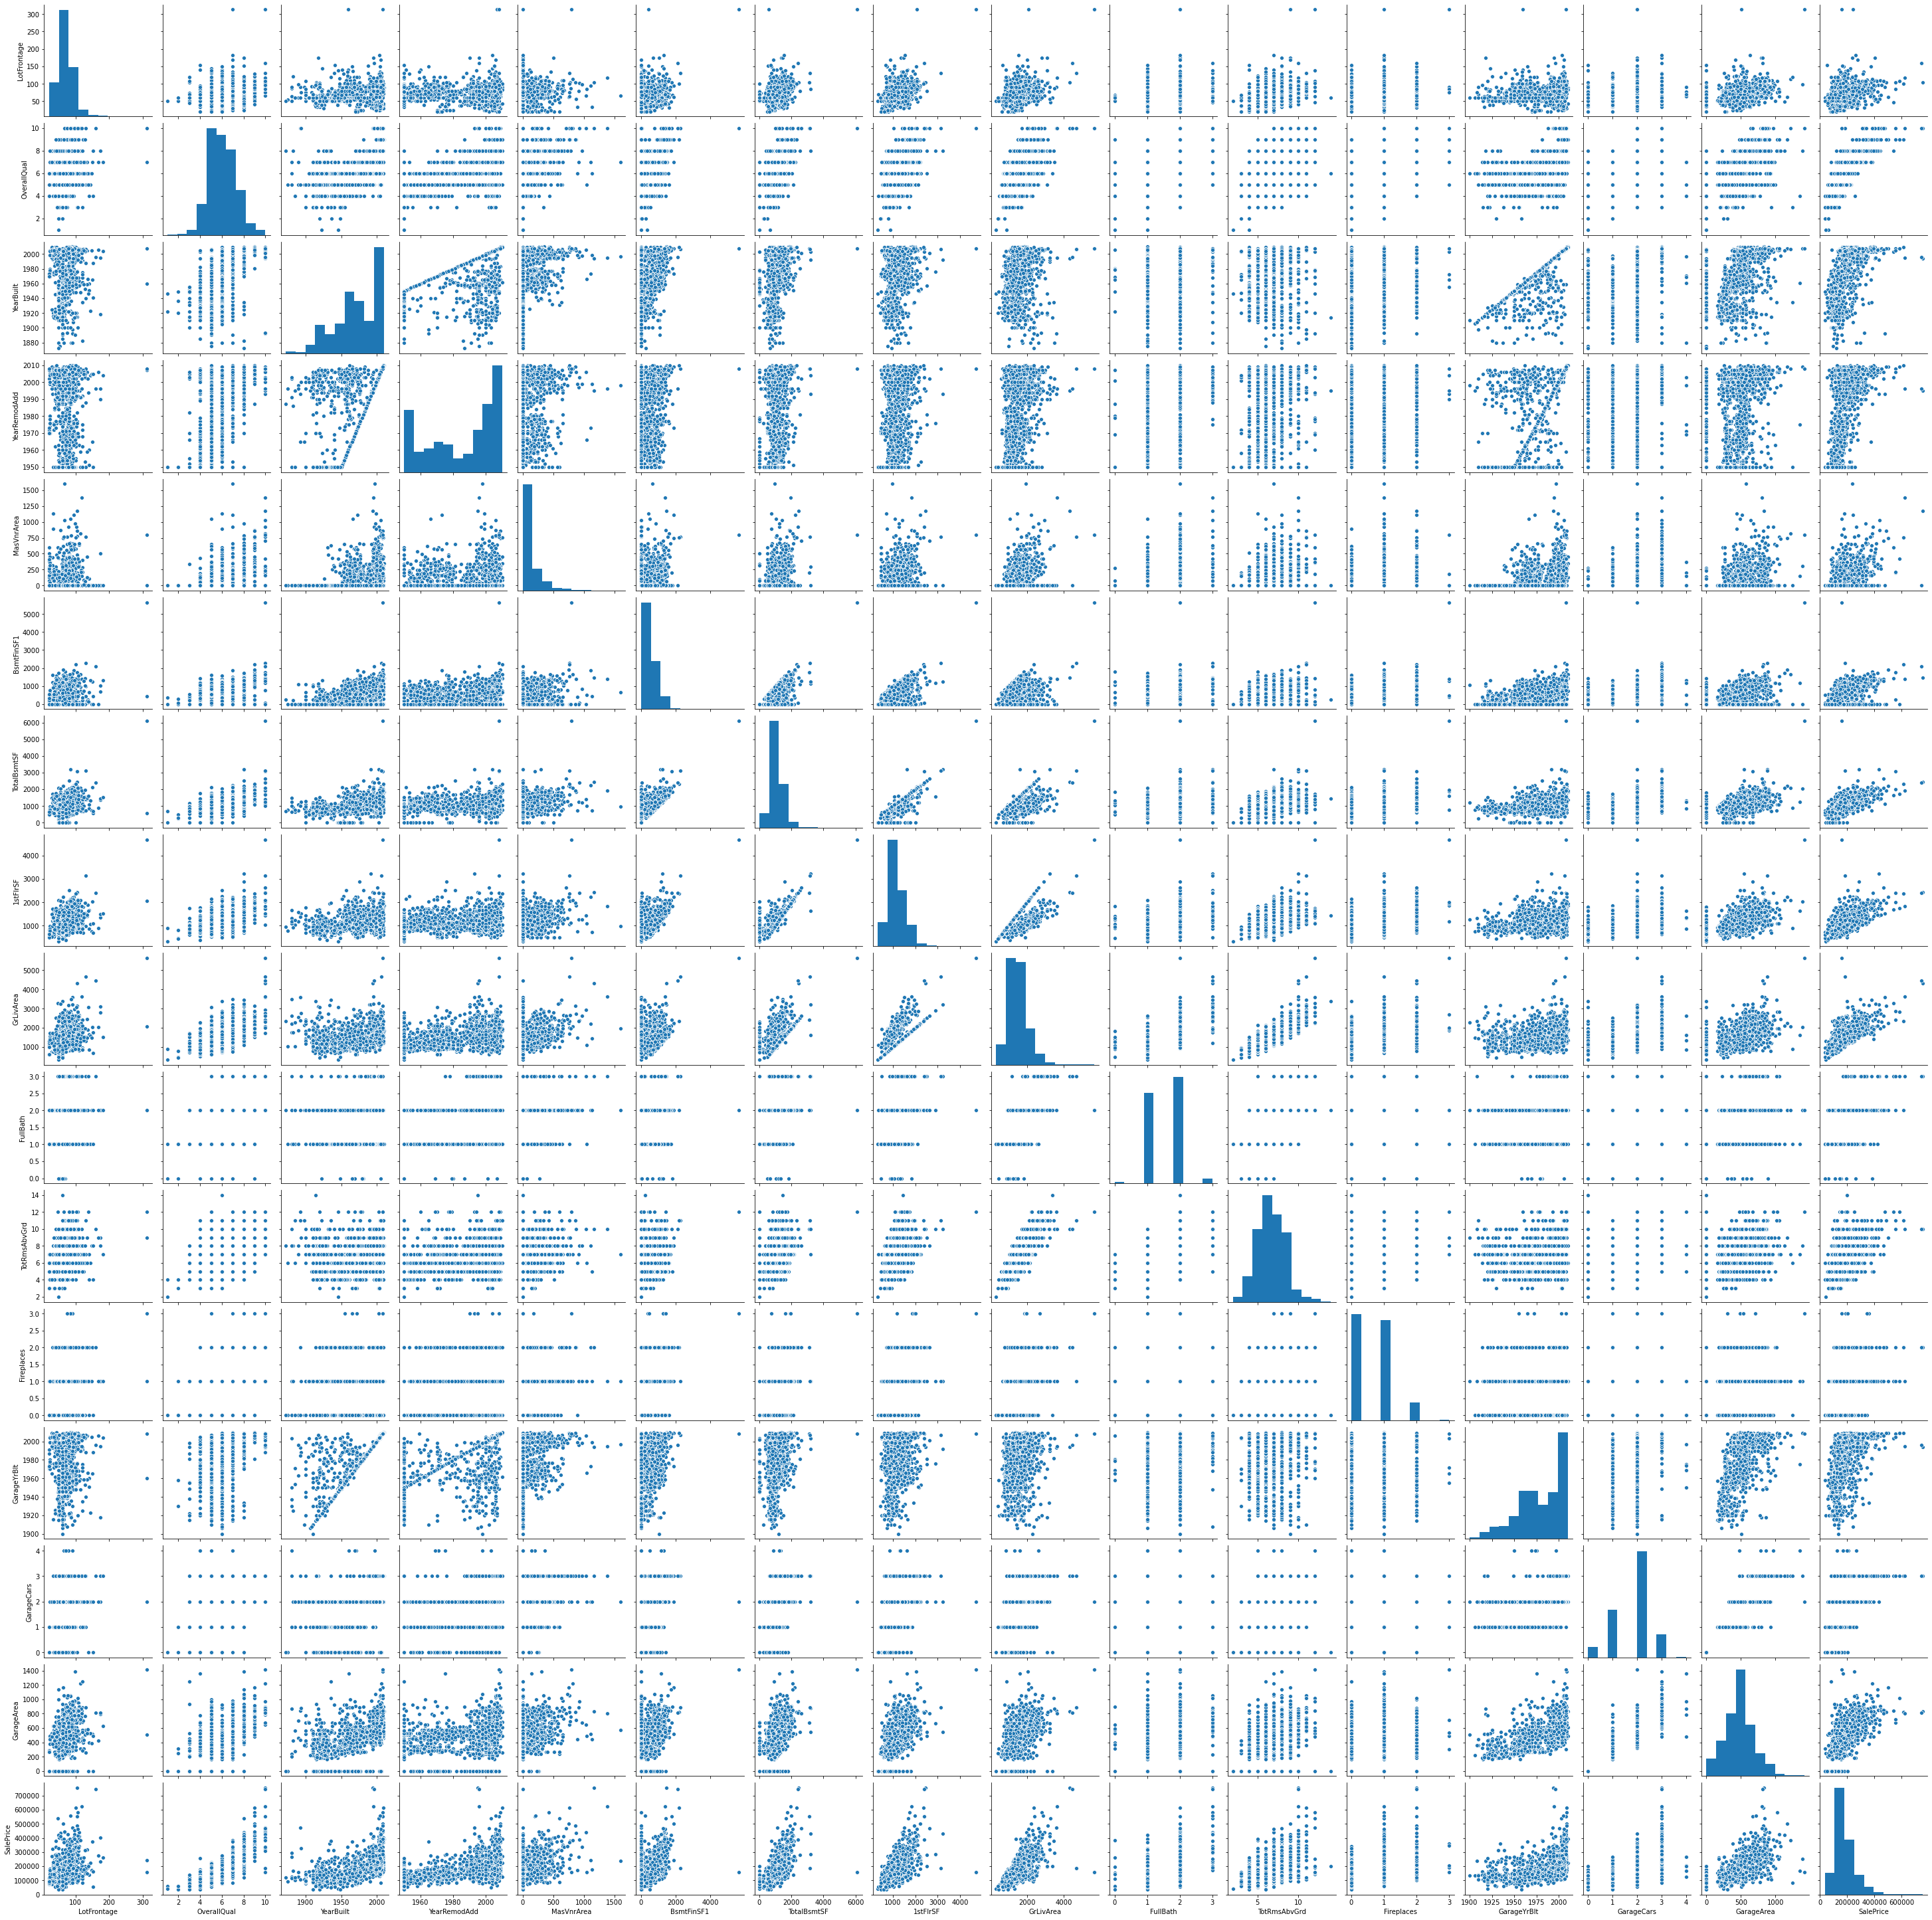

In [13]:
#### See pairplot 
sns.pairplot(train_df[numeric_features_with_SalePrice],height = 2.5)

## SalePrice and some Independent Variable 

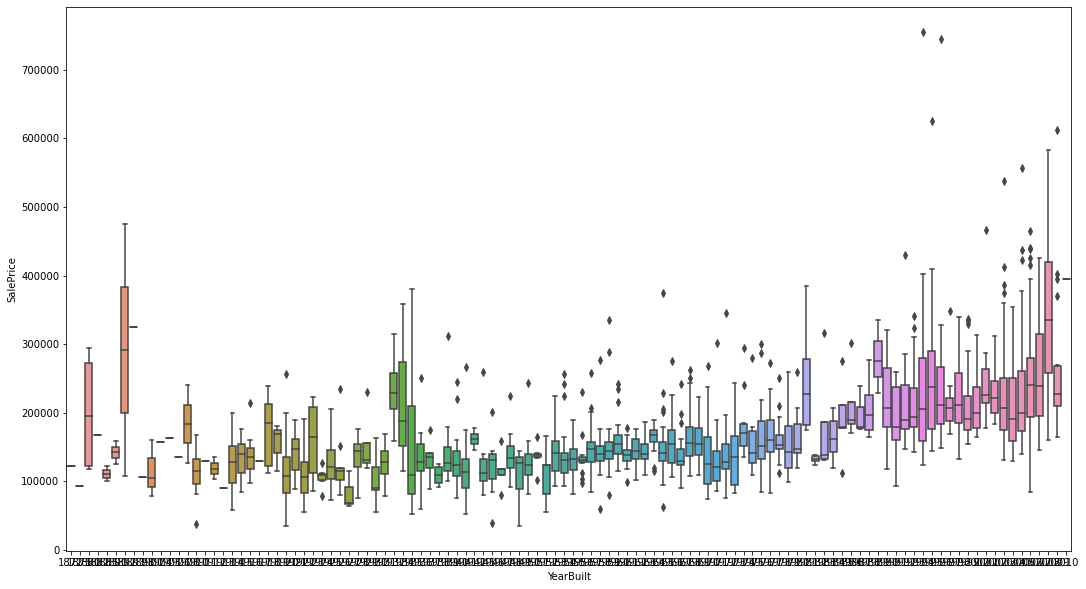

In [14]:
f, ax = plt.subplots(figsize=(18,10))
ax = sns.boxplot(x='YearBuilt',y='SalePrice',data=train_df)
plt.savefig("Sale-Qual.png")

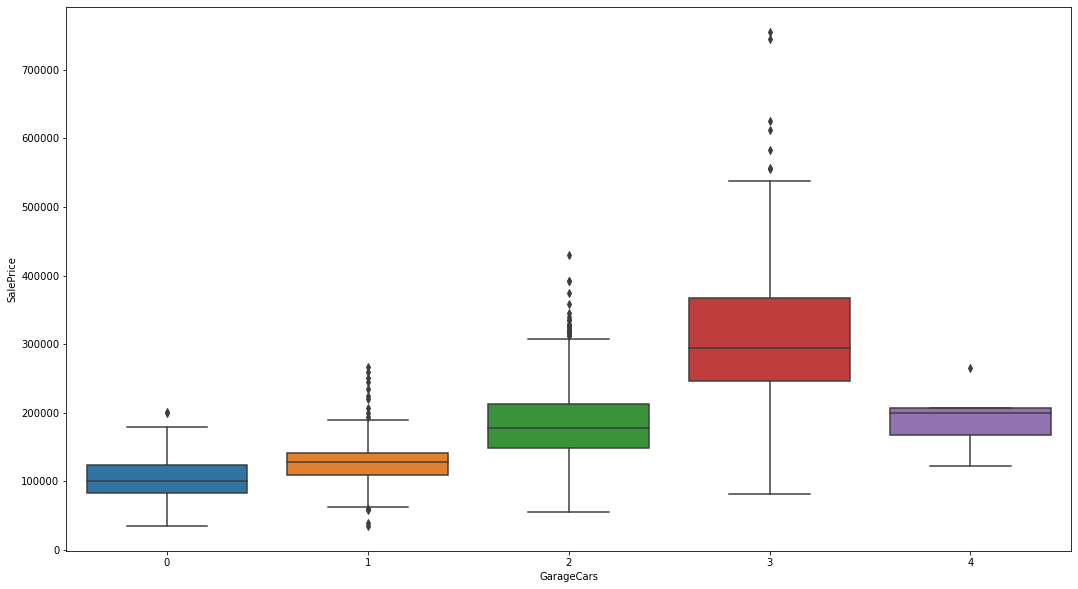

In [15]:
# Check for Garage vs sale price
f, ax = plt.subplots(figsize=(18,10))
ax = sns.boxplot(x='GarageCars',y='SalePrice',data=train_df)
plt.savefig("Sale-GarageCars.png")

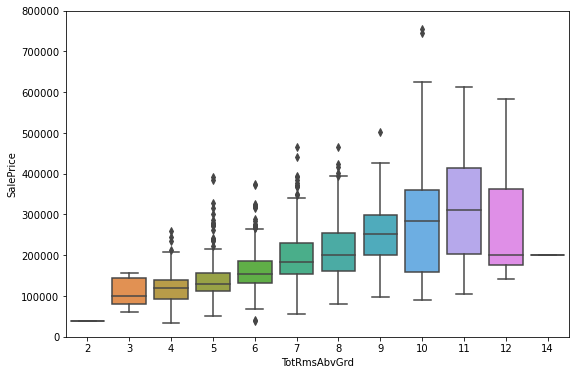

In [16]:
# Check for total rooms vs sale price
def plots_box(df, var='LotShape', target='SalePrice', size=(9,6)):
    fig, ax = plt.subplots(figsize=size)
    fig = sns.boxplot(x=var, y=target, data=df)
    fig.axis(ymin=0, ymax=800000)
    plt.show()
    
plots_box(train_df, var='TotRmsAbvGrd')

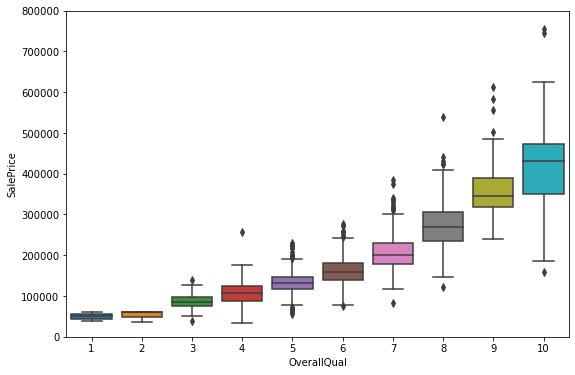

In [17]:
plots_box(train_df, var='OverallQual')

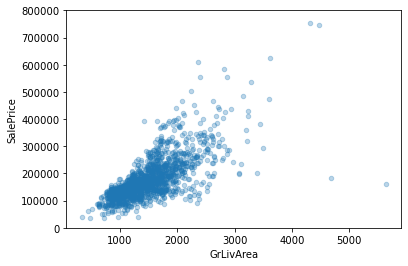

In [18]:
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.3, ylim=(0,800000));

# Feature Engineerring

## Filling Missing Values 

In [19]:
## Define Data
X_train = train_df[numeric_features]
X_test=test_df[numeric_features]

List missing value

             Total   Percent
LotFrontage    259  0.177397
GarageYrBlt     81  0.055479
MasVnrArea       8  0.005479


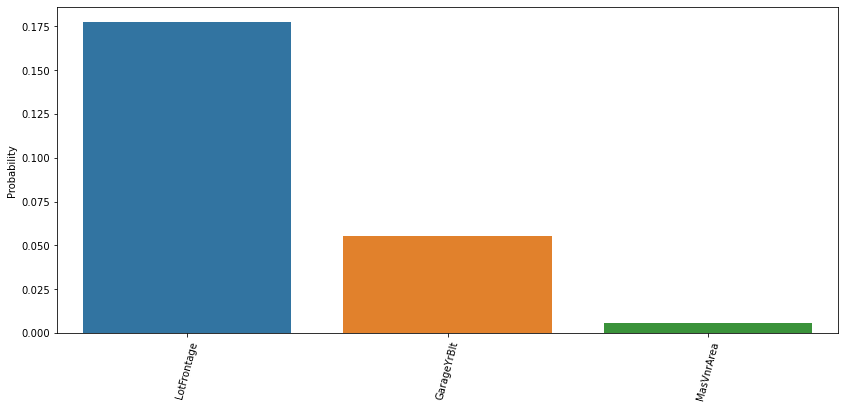

In [20]:
def check_missing_value(df, plot=False):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = total / len(df)
    missing_data = pd.concat([total, percent], keys=['Total', 'Percent'], axis=1)
    missing_data = missing_data[missing_data['Total'] > 0]
   
    print('List missing value')
    print('')
    print(missing_data)
    
    if plot == True:
        plt.figure(figsize=(14,6))
        sns.barplot(x=missing_data.index, y=missing_data['Percent'])
        plt.xticks(rotation=75)
        plt.ylabel('Probability')
        plt.show()
    
    return missing_data

missing_data = check_missing_value(X_train, plot=True)

### Fill missing value in train

In [21]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood 
#    , we can fill in missing values by the median LotFrontage of the neighborhood.
train_df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [22]:
train_df["LotFrontage"]  = train_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [23]:
## GarageYrBlt , Nan mean no garage
train_df['GarageYrBlt']=train_df['GarageYrBlt'].fillna(0)

In [24]:
train_df['MasVnrArea']=train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mode()[0])

### Fill in Test Data

List missing value

             Total   Percent
LotFrontage    227  0.155586
GarageYrBlt     78  0.053461
MasVnrArea      15  0.010281
GarageArea       1  0.000685
GarageCars       1  0.000685
TotalBsmtSF      1  0.000685
BsmtFinSF1       1  0.000685


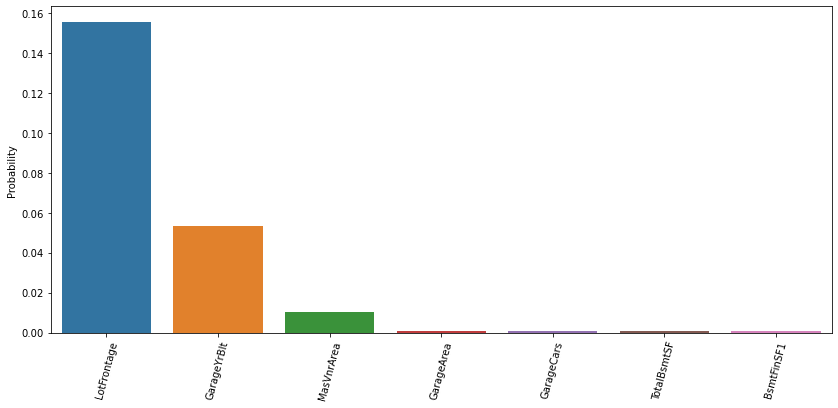

In [25]:
missing_data_test = check_missing_value(X_test, plot=True)

In [26]:
test_df["LotFrontage"]  = test_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [27]:
test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(0)

In [28]:
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])

In [29]:
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mode()[0])

In [30]:
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mode()[0])

In [31]:
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mode()[0])

In [32]:
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mode()[0])

In [33]:
X_test = test_df[numeric_features]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1459 non-null   float64
 1   OverallQual   1459 non-null   int64  
 2   YearBuilt     1459 non-null   int64  
 3   YearRemodAdd  1459 non-null   int64  
 4   MasVnrArea    1459 non-null   float64
 5   BsmtFinSF1    1459 non-null   float64
 6   TotalBsmtSF   1459 non-null   float64
 7   1stFlrSF      1459 non-null   int64  
 8   GrLivArea     1459 non-null   int64  
 9   FullBath      1459 non-null   int64  
 10  TotRmsAbvGrd  1459 non-null   int64  
 11  Fireplaces    1459 non-null   int64  
 12  GarageYrBlt   1459 non-null   float64
 13  GarageCars    1459 non-null   float64
 14  GarageArea    1459 non-null   float64
dtypes: float64(7), int64(8)
memory usage: 171.1 KB


## Remove Outlier

In [34]:
train_df.drop(train_df[(train_df['OverallQual']<5) & (train_df['SalePrice']>200000)].index, inplace=True)
train_df.drop(train_df[(train_df['GrLivArea']>4500) & (train_df['SalePrice']<300000)].index, inplace=True)
train_df.reset_index(drop=True, inplace=True)

In [35]:
X_train = train_df[numeric_features]

## Check Skew and Shape 

### Sale Price

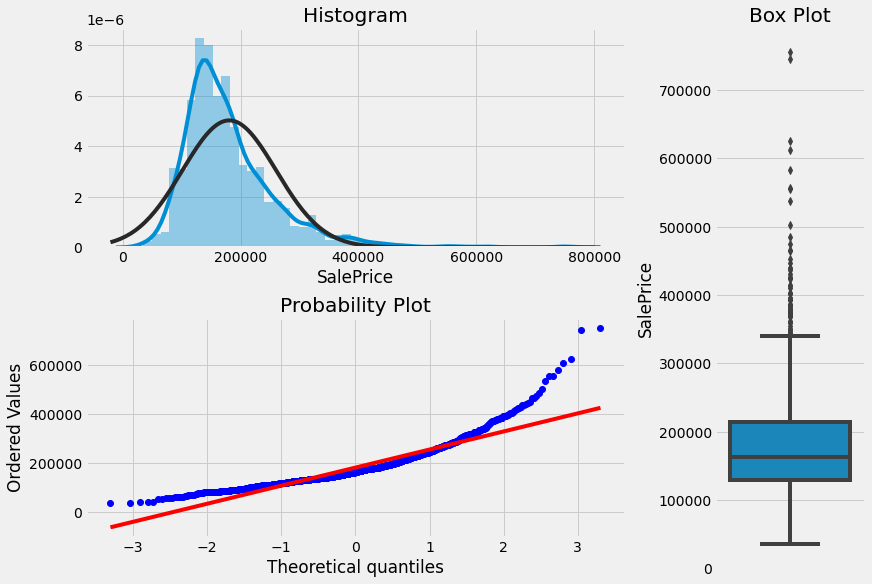

In [36]:
def plotting_3_chart(df, feature):
    import matplotlib.gridspec as gridspec
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, fit=norm, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train_df, 'SalePrice')

## Log-transformation of the target variable


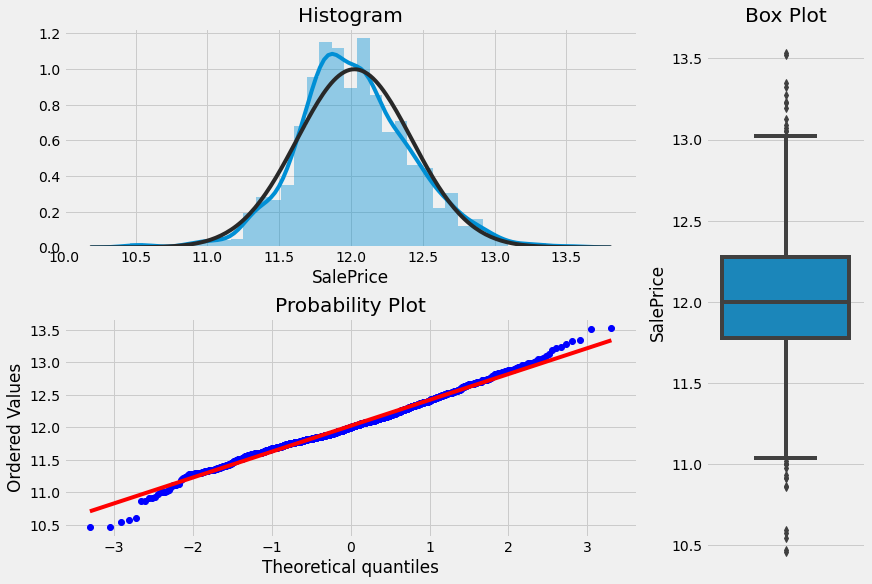

In [37]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])
y_train = train_df['SalePrice']
plotting_3_chart(train_df, 'SalePrice')

## Log Transformation For Indepentdent Varriable Using BoxCox

In [38]:
skew_features = train_df[numeric_features].skew()
skew_features

LotFrontage     1.548475
OverallQual     0.200484
YearBuilt      -0.613338
YearRemodAdd   -0.500913
MasVnrArea      2.695262
BsmtFinSF1      0.767050
TotalBsmtSF     0.513082
1stFlrSF        0.890096
GrLivArea       1.011340
FullBath        0.029921
TotRmsAbvGrd    0.659714
Fireplaces      0.632378
GarageYrBlt    -3.864814
GarageCars     -0.341670
GarageArea      0.132252
dtype: float64

In [39]:
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skew_index

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object')

In [40]:
for i in skew_index:
    train_df[i] = boxcox1p(train_df[i], boxcox_normmax(train_df[i] + 1))

In [41]:
train_df[numeric_features].skew()

LotFrontage     0.024786
OverallQual     0.200484
YearBuilt      -0.613338
YearRemodAdd   -0.500913
MasVnrArea      0.955949
BsmtFinSF1      0.364122
TotalBsmtSF     0.295937
1stFlrSF        0.002351
GrLivArea       0.014053
FullBath        0.029921
TotRmsAbvGrd    0.040888
Fireplaces      0.511593
GarageYrBlt    -3.864814
GarageCars     -0.341670
GarageArea      0.132252
dtype: float64

In [48]:
skew_features_test = test_df[numeric_features].skew()

In [49]:
high_skew_test = skew_features_test[skew_features > 0.5]
skew_index_test = high_skew_test.index
skew_index_test

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object')

In [52]:
for i in skew_index_test:
    test_df[i] = boxcox1p(test_df[i], boxcox_normmax(test_df[i] + 1))

In [54]:
test_df[numeric_features].skew()

LotFrontage     0.089937
OverallQual     0.181196
YearBuilt      -0.587657
YearRemodAdd   -0.399906
MasVnrArea      0.989834
BsmtFinSF1      0.356170
TotalBsmtSF     0.284217
1stFlrSF       -0.011179
GrLivArea       0.004480
FullBath        0.295839
TotRmsAbvGrd    0.059500
Fireplaces      0.588675
GarageYrBlt    -3.952018
GarageCars     -0.107770
GarageArea      0.296290
dtype: float64

# Build Predictive Model

## Final Data

In [55]:
X_train = train_df[numeric_features]
y_train = train_df['SalePrice']
X_test = test_df[numeric_features]

## Cross validation scores for each model

In [75]:
n_folds = 7
kf = KFold(n_folds, shuffle=True, random_state=42)
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Linear Regression

In [71]:
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
score = rmsle_cv(lin_reg)
print("\nLinearRegression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


LinearRegression score: 0.1392 (0.0108)



### Regularization Models

In [ ]:
#This kind of model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

#### Lasso

In [66]:
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]

In [76]:
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, 
                                              alphas=alphas2, 
                                              random_state=42, 
                                              cv=kf))

In [82]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1391 (0.0106)



#### Ridge

In [78]:
ridge = make_pipeline(RobustScaler(), RidgeCV(cv=kf))
rmsle_cv(ridge)

array([0.14742529, 0.15203779, 0.14888634, 0.13807845, 0.1309141 ,
       0.13787116, 0.11884978])

#### Elastic Net

In [79]:
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kf, l1_ratio=e_l1ratio)) 

### Boost Model

#### Gradient Boost

#### XGBoost 

#### LightGBM